In [1]:
import pandas as pd

In [2]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name.decode()
                pattern = patterns[pattern_name]
                key = "metacluster_"+str(metacluster_i)+".pattern_"+str(pattern_i)
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in pattern["seqlets_and_alnmts"]["seqlets"]:
                    pfms[key].append(seqlet.decode("utf-8"))
               
    return pfms

In [3]:
tfm_results_path="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/SIGNAL/modisco_crop_500/modisco_results_allChroms_counts.hdf5"
pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


40436


In [4]:
import pandas as pd
tomtom="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/SIGNAL/modisco_crop_500/counts.tomtom.tsv"
tomtom = pd.read_csv(tomtom, sep="\t", header=0)
tomtom

,Pattern,Num_Seqlets,Match_1,q-value,Match_2,q-value.1,Match_3,q-value.2,Match_4,q-value.3,...,Match_6,q-value.5,Match_7,q-value.6,Match_8,q-value.7,Match_9,q-value.8,Match_10,q-value.9
0,metacluster_0.pattern_0,6824,GATA3_GATA_2,7.061320e-02,GATA4_HUMAN.H11MO.0.A,7.061320e-02,GATA4_MOUSE.H11MO.0.A,7.061320e-02,GATA3_HUMAN.H11MO.0.A,7.061320e-02,...,GATA2_HUMAN.H11MO.0.A,0.100872,GATA3_GATA_1,0.284769,GATA3_MA0037.3,0.284769,GATA4_GATA_1,0.284769,GATA5_GATA_1,0.284769
1,metacluster_0.pattern_1,5082,CTCF_MA0139.1,1.165610e-17,CTCF_HUMAN.H11MO.0.A,2.122470e-13,CTCF_MOUSE.H11MO.0.A,4.355310e-12,CTCFL_HUMAN.H11MO.0.A,1.466450e-07,...,CTCF_C2H2_1,0.000001,CTCFL_MA1102.1,0.000009,ZIC2_MOUSE.H11MO.0.C,0.203956,ZIC3_HUMAN.H11MO.0.B,0.203956,ZIC3_MOUSE.H11MO.0.A,0.203956
2,metacluster_0.pattern_2,4652,SP3_HUMAN.H11MO.0.B,8.820060e-06,SP3_MOUSE.H11MO.0.B,8.820060e-06,KLF12_HUMAN.H11MO.0.C,9.094040e-06,KLF3_HUMAN.H11MO.0.B,2.000690e-05,...,SP1_HUMAN.H11MO.0.A,0.000084,SP1_MA0079.3,0.000139,KLF5_MA0599.1,0.000580,SP2_HUMAN.H11MO.0.A,0.000592,SP2_MOUSE.H11MO.0.B,0.000592
3,metacluster_0.pattern_3,3093,BACH2_HUMAN.H11MO.0.A,1.711430e-05,BACH2_MOUSE.H11MO.0.A,1.711430e-05,Bach1+Mafk_MA0591.1,2.633210e-05,NFE2_HUMAN.H11MO.0.A,2.633210e-05,...,BACH1_HUMAN.H11MO.0.A,0.000026,NF2L2_HUMAN.H11MO.0.A,0.000026,NF2L2_MOUSE.H11MO.0.A,0.000026,NFE2_MOUSE.H11MO.0.A,0.000026,MAF+NFE2_MA0501.1,0.000026
4,metacluster_0.pattern_4,1971,ELF2_HUMAN.H11MO.0.C,5.891710e-07,ELF1_MOUSE.H11MO.0.A,5.891710e-07,ETV1_HUMAN.H11MO.0.A,1.835240e-06,ELF1_HUMAN.H11MO.0.A,1.835240e-06,...,GABPA_MOUSE.H11MO.0.A,0.000002,ELK4_MA0076.2,0.000004,ELK1_MOUSE.H11MO.0.B,0.000004,Gabpa_MA0062.2,0.000004,EHF_ETS_1,0.000004
5,metacluster_0.pattern_5,982,NFYA_MA0060.3,4.883120e-01,FOXI1_HUMAN.H11MO.0.B,4.883120e-01,FOXI1_MOUSE.H11MO.0.B,4.883120e-01,NFYB_HUMAN.H11MO.0.A,4.883120e-01,...,NFYA_HUMAN.H11MO.0.A,0.488312,NFYA_MOUSE.H11MO.0.A,0.488312,NFYC_HUMAN.H11MO.0.A,0.488312,NFYC_MOUSE.H11MO.0.B,0.488312,NFYB_MA0502.1,0.488312
6,metacluster_0.pattern_6,643,NFIC_HUMAN.H11MO.0.A,6.553050e-05,NFIA_HUMAN.H11MO.0.C,1.948580e-04,NFIA_MOUSE.H11MO.0.C,1.948580e-04,NFIC+TLX1_MA0119.1,4.167090e-04,...,NFIX_NFI_1,0.001144,NFIB_NFI_1,0.002196,NFIB_MOUSE.H11MO.0.C,0.260161,AP2C_MOUSE.H11MO.0.A,0.285638,ESR2_MA0258.2,0.383694
7,metacluster_0.pattern_7,584,NRF1_MOUSE.H11MO.0.A,5.959930e-06,NRF1_HUMAN.H11MO.0.A,5.959930e-06,NRF1_NRF_1,1.970820e-05,NRF1_MA0506.1,1.112250e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,metacluster_0.pattern_8,584,NRF1_MA0506.1,1.072880e-02,NRF1_NRF_1,1.161860e-02,NRF1_MOUSE.H11MO.0.A,1.161860e-02,NRF1_HUMAN.H11MO.0.A,1.343380e-02,...,MYC_MOUSE.H11MO.0.A,0.359263,Hes1_MA1099.1,0.359263,EGR2_C2H2_2,0.359263,EGR3_C2H2_1,0.359263,EGR3_MA0732.1,0.359263
9,metacluster_0.pattern_9,520,FOSB+JUNB_MA1136.1,5.499890e-06,FOSB+JUN_MA1127.1,5.499890e-06,FOSL1+JUN_MA1129.1,2.102860e-05,FOSL2+JUN_MA1131.1,2.243050e-05,...,FOSL2+JUND_MA1145.1,0.000032,JUNB_MA1140.1,0.000037,CREB1_HUMAN.H11MO.0.A,0.000041,CREB1_MOUSE.H11MO.0.A,0.000041,FOSL2+JUNB_MA1139.1,0.000044


In [5]:
bed="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/DNASE_PE/K562/uncorrected_model_08.31.2022_filters_512_dil_8/uncorrected_model/interpret/K562.interpreted_regions_v2.bed"
bed = pd.read_csv(bed, sep="\t", header=None)
bed.head()

,0,1,2,3,4,5,6,7,8,9
0,chr6,17986713,17988441,Peak_90944,635,.,3.77872,63.55936,61.36478,717
1,chr8,73459575,73459885,Peak_75344,985,.,10.26041,98.50743,96.21889,139
2,chr19,42280183,42280689,Peak_208597,70,.,1.35803,7.06332,5.26323,67
3,chr19,46697172,46697878,Peak_1356,1000,.,25.96148,3868.53516,3864.21338,404
4,chr17,19346602,19347490,Peak_35711,1000,.,17.27071,395.66913,392.99829,522


In [6]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["Pattern"].values:
        match_name = tomtom[tomtom["Pattern"]==key]["Match_1"]
        keyd = key.split("_")[1].replace(".pattern","")+"_"+key.split("_")[-1]+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            lists.append(blist)
    else:
        print(key)
            

metacluster_0.pattern_0
metacluster_0.pattern_1
metacluster_0.pattern_2
metacluster_0.pattern_3
metacluster_0.pattern_4
metacluster_0.pattern_5
metacluster_0.pattern_6
metacluster_0.pattern_7
metacluster_0.pattern_8
metacluster_0.pattern_9
metacluster_0.pattern_10
metacluster_0.pattern_11
metacluster_0.pattern_12
metacluster_0.pattern_13
metacluster_0.pattern_14
metacluster_0.pattern_15
metacluster_0.pattern_16
metacluster_0.pattern_17
metacluster_0.pattern_18
metacluster_0.pattern_19
metacluster_0.pattern_20
metacluster_0.pattern_21
metacluster_0.pattern_22
metacluster_0.pattern_23
metacluster_0.pattern_24
metacluster_0.pattern_25
metacluster_0.pattern_26
metacluster_0.pattern_27
metacluster_0.pattern_28


In [7]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

26807
       0          1          2                 3
0  chr15   95929525   95929555  0_0_GATA3_GATA_2
1   chr1   23899150   23899180  0_0_GATA3_GATA_2
2   chr7  116876996  116877026  0_0_GATA3_GATA_2
3  chr12  104408741  104408771  0_0_GATA3_GATA_2
4   chr7   39810370   39810400  0_0_GATA3_GATA_2


In [8]:
data.to_csv("configs/dnase_annotations/modisco_hits_k562_dnase_uncorrected.bed",sep="\t",index=False,header=False)


In [9]:
modisco_hits = pd.read_csv("configs/dnase_annotations/modisco_hits_k562_dnase_uncorrected.bed", sep="\t", header=None)


In [2]:

# intersect tf_chip bed with merged peaks and resd it in


In [12]:
chip_regions = pd.read_csv("configs/dnase_annotations/chip_in_bed.bed", sep="\t", header=None)


In [13]:
chip_regions.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,796300,796320,HMBOX1,676,.,30.34099,-1.0,3.49986,265,chr1,796045,796575
1,chr1,904422,904442,SIN3A,604,.,14.48742,-1.0,1.33860,282,chr1,904150,904714
2,chr1,904427,904447,ZNF740,1000,.,16.93697,-1.0,0.13690,302,chr1,904135,904739
3,chr1,904459,904479,ZFX,1000,.,103.41345,-1.0,4.44212,325,chr1,904144,904794
4,chr1,904566,904586,SRSF1,555,.,13.05951,-1.0,1.37650,235,chr1,904341,904811


In [14]:
modisco_hits.head()

,0,1,2,3
0,chr15,95929525,95929555,0_0_GATA3_GATA_2
1,chr1,23899150,23899180,0_0_GATA3_GATA_2
2,chr7,116876996,116877026,0_0_GATA3_GATA_2
3,chr12,104408741,104408771,0_0_GATA3_GATA_2
4,chr7,39810370,39810400,0_0_GATA3_GATA_2


In [15]:
#chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks_full.bed", sep="\t", header=None)


In [16]:
#chip_intersect = chip_intersect.drop_duplicates()
#chip_intersect.head()


In [17]:
#motif_chip_count_matrix.shape
peaks = pd.read_csv("configs/dnase_annotations/merged.bed",header=None,sep="\t")
total_bases = np.sum(peaks[2]-peaks[1])

total_bases

12986861

In [21]:
import scipy
import scipy.stats
import subprocess
import os
def compute_cooccurrence_pvals(modisco,chip,total_bases):
    """
    Given the number of motif hits in each peak, computes p-value of
    co-occurrence for each pair of motifs, including self pairs.
    Returns an M x N array of p-values for the M motifs.
    """
    
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))
    print(unique_motifs)
    
    unique_motifs = [i for i in unique_motifs if i is not np.nan]

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0 ]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    num_motifs = len(unique_motifs)
    num_chip = len(uniq_tfs)
    pvals = np.ones((num_motifs, num_chip))
    odds = np.ones((num_motifs, num_chip))

    print(num_motifs,num_chip)
    
    def merge_file(temp3,out_name):
        temp3.to_csv(out_name+".bed",sep="\t",header=False,index=False)
        
        with open(out_name+"_sorted.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "sort","-i",out_name+".bed"], stdout=f)
            proc.wait()
            
        with open(out_name+"_merged.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "merge","-i",out_name+"_sorted.bed"], stdout=f)
            proc.wait()
            
        temp3 = pd.read_csv(out_name+"_merged.bed",sep="\t",header=None)
        #print(temp3.shape)
        return temp3

    def intersect_file(out_name):
        
        with open(out_name+"_intersect.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "intersect","-a","temp/temp_merged.bed", "-b", "temp/temp1_merged.bed", "-wo"], stdout=f)
            proc.wait()
            
        if os.stat(out_name+"_intersect.bed").st_size == 0:
            return 0
        else:
            temp3 = pd.read_csv(out_name+"_intersect.bed",sep="\t",header=None)
            return np.sum(temp3[6])
        
    # Significance is based on a Fisher's exact test. If the motifs were
    # present in peaks randomly, we'd independence of occurrence.
    # For self-co-occurrence, the null model is not independence, but
    # collisions
    dicts = {}
    for i in range(num_motifs):
        temp3  = modisco[modisco[3]==unique_motifs[i]]
        temp3 =  merge_file(temp3,"temp/temp")
        Xin = np.sum(temp3[2]-temp3[1])
        print(i)
        #print(Xin)

        for j in range(num_chip):
            
            #if uniq_tfs[j] not in dicts:
            temp3 = chip[chip[3]==uniq_tfs[j]]
            temp3 = merge_file(temp3,"temp/temp1")
            Yin =  np.sum(temp3[2]-temp3[1])
                #print(Yin)
            dicts[uniq_tfs[j]] = Yin
            
            out_file = intersect_file("temp/temp3")
            motif_chip=out_file
            #print(motif_chip)
        
            no_chip_only_motif = Xin - motif_chip
            no_motif_only_chip = dicts[uniq_tfs[j]] - motif_chip

            no_chip_no_motif = total_bases - no_chip_only_motif - no_motif_only_chip - motif_chip 

            # Contingency table (universe is set of all possible combination):
            #              no chip 1  |  has chip 1
            # no motif 2       A       |      B
            # -------------------------+--------------
            # has motif 2      C       |      D
            # The Fisher's exact test evaluates the significance of the
            # association between the two classifications
            cont_table = np.array([
                [
                    no_chip_no_motif,
                    no_motif_only_chip
                ],
                [
                   no_chip_only_motif,
                 motif_chip
                ]
            ])
            #print(uniq_tfs[j],cont_table)
            try:
                test_o = scipy.stats.fisher_exact(
                    cont_table, alternative="greater"
                )
                pval = test_o[1]
                odd = test_o[0]
            except:
                print(cont_table)
                print(motif_chip)
                print(Xin)
                print(Yin)
                print(uniq_tfs[j])
                print(unique_motifs[i])


            pvals[i, j] = pval
            odds[i,j] = odd
            
    return pvals, odds, unique_motifs,uniq_tfs 

motif_chip_pval_matrix, odds_ratio,unique_motifs,uniq_tfs  = compute_cooccurrence_pvals(modisco_hits,chip_regions,total_bases)



['0_0_GATA3_GATA_2', '0_4_ELF2_HUMAN.H11MO.0.C', '0_7_NRF1_MOUSE.H11MO.0.A', '0_11_ZN143_MOUSE.H11MO.0.A', '0_16_REST_MA0138.2', '0_21_Rarg.mouse_nuclearreceptor_3', '0_9_FOSB+JUNB_MA1136.1', '0_3_BACH2_HUMAN.H11MO.0.A', '0_6_NFIC_HUMAN.H11MO.0.A', '0_12_ARNTL_bHLH_1', '0_27_GABPA_MOUSE.H11MO.0.A', '0_5_NFYA_MA0060.3', '0_10_STA5A_HUMAN.H11MO.0.A', '0_23_KLF6_HUMAN.H11MO.0.A', '0_17_RUNX1_HUMAN.H11MO.0.A', '0_20_ETV6_ETS_1', '0_14_ZBTB33_MA0527.1', '0_28_Gabpa_MA0062.2', '0_18_KLF5_MA0599.1', '0_1_CTCF_MA0139.1', '0_15_ZNF76_HUMAN.H11MO.0.C', '0_8_NRF1_MA0506.1', '0_24_STAT1_HUMAN.H11MO.0.A', '0_22_TAL1_HUMAN.H11MO.0.A', '0_25_ZNF524_C2H2_2', '0_26_RFX3_MOUSE.H11MO.0.C', '0_13_TYY1_HUMAN.H11MO.0.A', '0_2_SP3_HUMAN.H11MO.0.B', '0_19_ZNF384_MA1125.1']
29 461
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


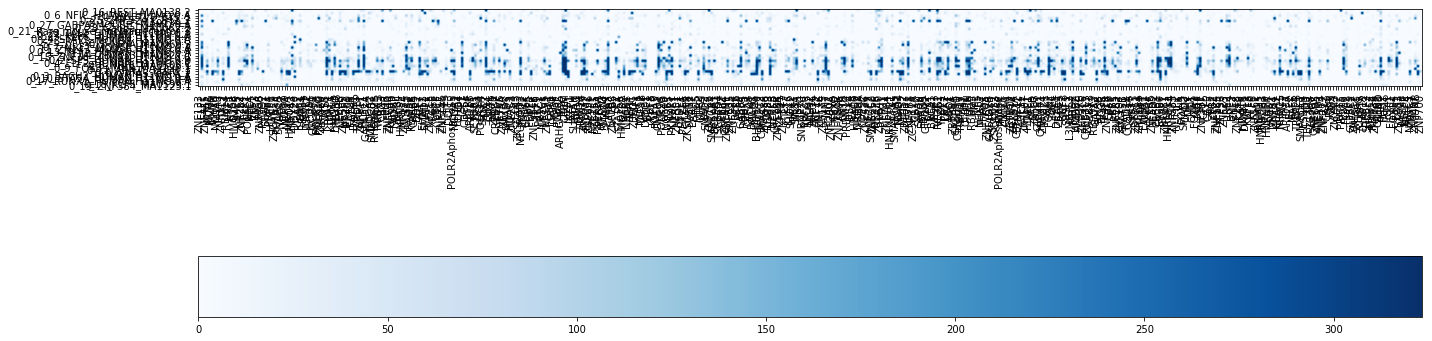

In [23]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


 
inds = cluster_matrix_indices(motif_chip_pval_matrix,10)

zero_mask = motif_chip_pval_matrix == 0
min_val = np.min(motif_chip_pval_matrix[~zero_mask])
motif_chip_pval_matrix[zero_mask] = min_val
logpval_matrix = -np.log10(motif_chip_pval_matrix)
 

hmap = ax.imshow(logpval_matrix[inds], cmap="Blues")


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

In [24]:
unique_motifs

from statsmodels.sandbox.stats.multicomp import multipletests


0_0_GATA3_GATA_2
['GATA1' 'TAL1' 'TCF12' 'TCF3' 'PHB2']
0_1_CTCF_MA0139.1
['CTCF' 'RAD21' 'SMC3' 'XRCC4' 'ZNF143']
0_2_SP3_HUMAN.H11MO.0.B
['SP2' 'SP1' 'EGR1' 'CREBBP' 'ZNF148']
0_3_BACH2_HUMAN.H11MO.0.A
['NFE2L1' 'MAFF' 'NFE2' 'MAFG' 'MAFK']
0_4_ELF2_HUMAN.H11MO.0.C
['ELK1' 'ELF1' 'GABPA' 'SPI1' 'GABPB1']
0_5_NFYA_MA0060.3
['COPS2' 'NFYB' 'NFYA' 'FOS' 'SP2']
0_6_NFIC_HUMAN.H11MO.0.A
['NFIX' 'NFIC' 'SMAD1' 'SNRNP70' 'ZNF518B']
0_7_NRF1_MOUSE.H11MO.0.A
['NRF1' 'POU5F1' 'ZBTB2' 'ZNF639' 'MEIS2']
0_8_NRF1_MA0506.1
['COPS2' 'POU5F1' 'E2F4' 'NRF1' 'SUZ12']
0_9_FOSB+JUNB_MA1136.1
['ATF2' 'KHSRP' 'RFX5' 'ZBTB12' 'CREB1']
0_10_STA5A_HUMAN.H11MO.0.A
['STAT5A' 'DDX20' 'BCL6' 'SIRT6' 'EP300']
0_11_ZN143_MOUSE.H11MO.0.A
['SUZ12' 'SIX5' 'HCFC1' 'ZNF143' 'POU5F1']
0_12_ARNTL_bHLH_1
['TFE3' 'USF2' 'RAD51' 'USF1' 'MITF']
0_13_TYY1_HUMAN.H11MO.0.A
['YY1' 'YBX3' 'KAT8' 'TAF1' 'SMAD5']
0_14_ZBTB33_MA0527.1
['NR0B1' 'ARHGAP35' 'CHD2' 'ZBTB33' 'ZHX1']
0_15_ZNF76_HUMAN.H11MO.0.C
['SUZ12' 'SMAD2' 'SIX5' 'ZNF

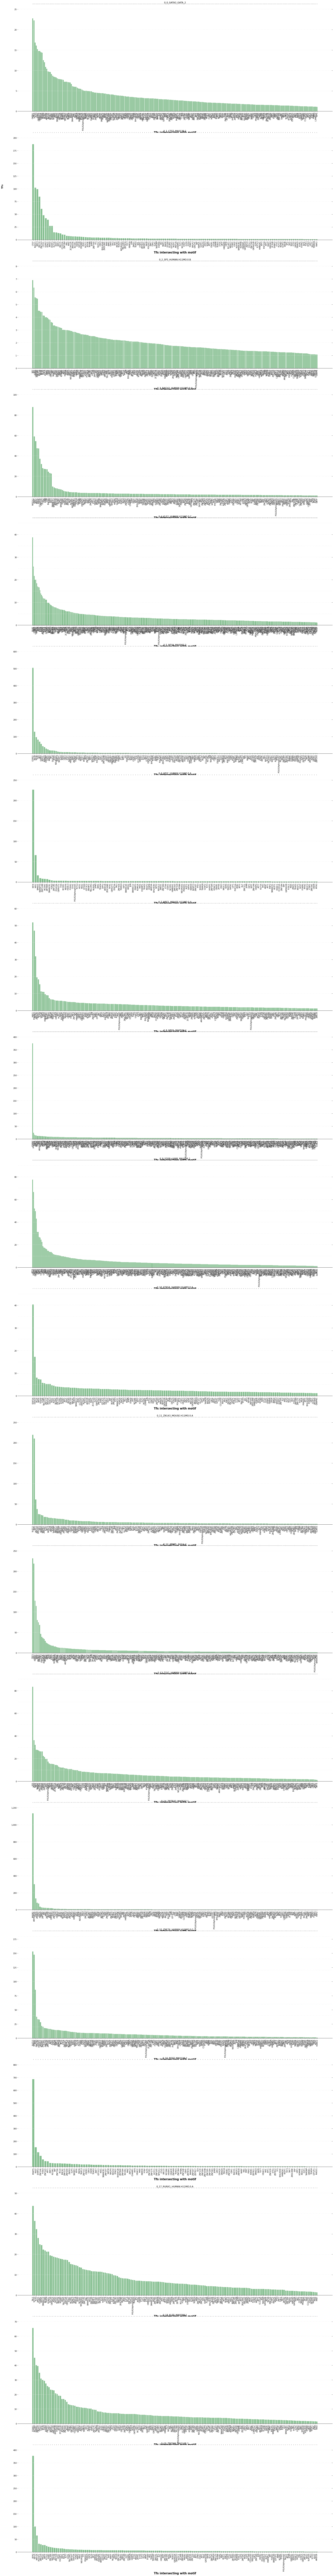

<Figure size 432x288 with 0 Axes>

In [25]:
fig, axs = plt.subplots(20,figsize=(30,250))
from matplotlib.ticker import StrMethodFormatter


for i in range(20):
    print(unique_motifs[i])
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]
    ax.bar(tfs, counts,color="#86bf91")
    ax.set_xticks(tfs,rotation='vertical')

    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    ax.set_title(unique_motifs[i])

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])
    #print(odds_ratio[i,np.array(p_adjusted[0])][idxs][-5:])
    
for i,x in enumerate(axs):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=15)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
plt.show()
plt.tight_layout()

In [46]:

motif_chip_pval_matrix[1,:]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999964, 1.        , 1.        , 1.        , 0.99999989,
       1.        , 1.        , 0.99999939, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999965,
       1.        , 0.99999987, 1.        , 1.        , 1.        ,
       1.        , 0.99999995, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999959, 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       0.99999962, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999998,
       1.        , 1.        , 0.99999972, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [53]:
unique_motifs

['0_0_IRF1_MOUSE.H11MO.0.A',
 '0_1_CTCF_MA0139.1',
 '0_2_SPIB_MOUSE.H11MO.0.A',
 '0_3_JDP2_MA0655.1',
 '0_4_RUNX3_HUMAN.H11MO.0.A',
 '0_5_RELB_HUMAN.H11MO.0.C',
 '0_6_Gabpa_MA0062.2',
 '0_7_SP1_HUMAN.H11MO.0.A',
 '0_8_REL_MA0101.1',
 '0_9_NFKB1_HUMAN.H11MO.1.B',
 '0_10_NFYB_HUMAN.H11MO.0.A',
 '0_11_ATF1_HUMAN.H11MO.0.B',
 '0_12_BATF_HUMAN.H11MO.0.A',
 '0_13_POU5F1_MA1115.1',
 '0_14_RUNX1_HUMAN.H11MO.0.A',
 '0_15_NRF1_MOUSE.H11MO.0.A',
 '0_16_PAX2_PAX_1',
 '0_17_ETS1_HUMAN.H11MO.0.A',
 '0_18_COE1_MOUSE.H11MO.0.A',
 '0_19_ZNF76_HUMAN.H11MO.0.C',
 '0_20_MEF2D_HUMAN.H11MO.0.A',
 '0_21_IRF9_IRF_1',
 '0_22_SPIB_ETS_1',
 '0_23_TYY1_HUMAN.H11MO.0.A',
 '0_24_MSX2_homeodomain_1',
 '0_25_HNF1B_HUMAN.H11MO.0.A',
 '0_26_ZBTB33_MA0527.1',
 '0_27_JUND_MA0492.1',
 '0_28_Rfx1_MA0509.1',
 '0_29_PAX5_MOUSE.H11MO.0.A',
 '0_30_BATF3_HUMAN.H11MO.0.B',
 '0_31_IRF7_HUMAN.H11MO.0.C',
 '0_32_ZNF384_MA1125.1',
 '0_33_IRF4_HUMAN.H11MO.0.A',
 '0_34_SP1_HUMAN.H11MO.0.A',
 '0_35_BATF+JUN_MA0462.1',
 '0_36_GLI2_C2H2_

In [18]:
data={}
data["pval"] = motif_chip_pval_matrix
data["odds"] = odds_ratio
data["motif_names"] = unique_motifs
data["tf_names"] = uniq_tfs

import pickle as pkl
ft = open("saving_pvals.pkl","wb")
pkl.dump(data,ft)